# KnapsackV2 - Group 3
1BM120

Libraries:

In [1]:
import numpy as np
import or_gym
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
%matplotlib inline

## Part 1: Explore Knapsack

 **Task 1:** 
- Create an instance of the environment
- Print and plot the state and action space

In [2]:
env = or_gym.make("Knapsack-v2") # Create an  instance of the environment 
env.mask = False

In [3]:
state = env.reset()
action_space = env.action_space.n
print('Action space', action_space, "\n")
for item in range(env.N):
    print("Item: {} \t ratio: {} \t reward: {} \t weight: {} \t limit: {}".format(item, round(state[1][item] / state[0][item],2), state[1][item], state[0][item], state[2][item]))

Action space 200 

Item: 0 	 ratio: 2.75 	 reward: 11 	 weight: 4 	 limit: 2
Item: 1 	 ratio: 0.76 	 reward: 51 	 weight: 67 	 limit: 7
Item: 2 	 ratio: 0.52 	 reward: 43 	 weight: 83 	 limit: 9
Item: 3 	 ratio: 0.27 	 reward: 6 	 weight: 22 	 limit: 8
Item: 4 	 ratio: 1.07 	 reward: 78 	 weight: 73 	 limit: 3
Item: 5 	 ratio: 0.51 	 reward: 26 	 weight: 51 	 limit: 1
Item: 6 	 ratio: 5.22 	 reward: 94 	 weight: 18 	 limit: 9
Item: 7 	 ratio: 0.9 	 reward: 38 	 weight: 42 	 limit: 9
Item: 8 	 ratio: 3.67 	 reward: 11 	 weight: 3 	 limit: 1
Item: 9 	 ratio: 0.89 	 reward: 42 	 weight: 47 	 limit: 6
Item: 10 	 ratio: 2.3 	 reward: 46 	 weight: 20 	 limit: 2
Item: 11 	 ratio: 0.0 	 reward: 0 	 weight: 62 	 limit: 3
Item: 12 	 ratio: 0.08 	 reward: 1 	 weight: 13 	 limit: 6
Item: 13 	 ratio: 0.4 	 reward: 4 	 weight: 10 	 limit: 7
Item: 14 	 ratio: 23.75 	 reward: 95 	 weight: 4 	 limit: 7
Item: 15 	 ratio: 0.21 	 reward: 17 	 weight: 81 	 limit: 9
Item: 16 	 ratio: 2.35 	 reward: 87 	 wei

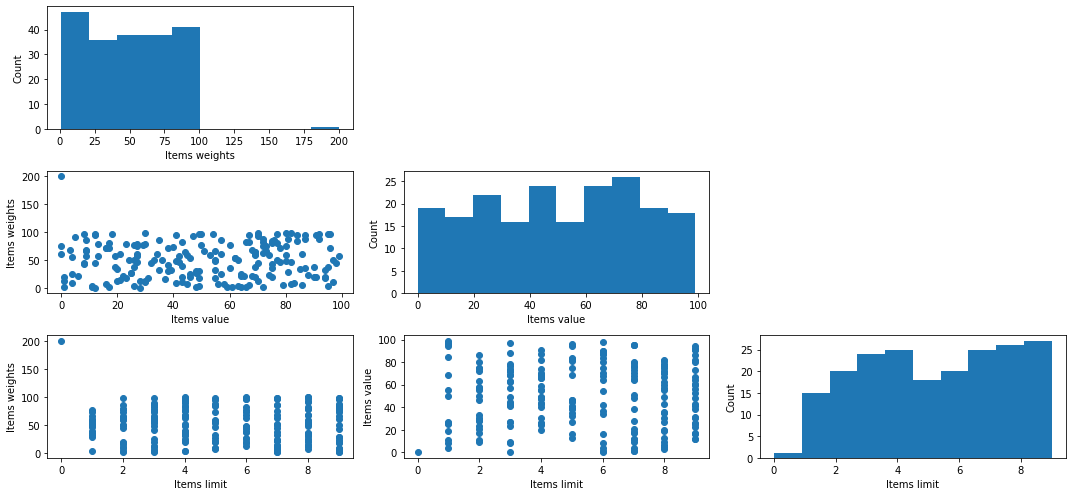

In [4]:
X = np.array([state[0], state[1], state[2]]).T
scatterplotmatrix(X, figsize=(15, 7), names = ["Items weights", "Items value", "Items limit"])
plt.tight_layout()
plt.show()

**Task 2:**
- Sample an action from the environment.
- Call the step function and inspect the outputs.

**Task 3:**
- Randomly interact with the envrionment for two episodes.  

In [5]:
for episode in range(2):
    state = env.reset()# get the starting state from the env.
    total_reward = 0; weight = 0; nr_items = 0
    done = False
    print("\nEPISODE ", episode)
    print("__________")
    for step in range(99): 
        action = env.action_space.sample() # is the index of the items list
        new_state, reward, done, info = env.step(action) #give the action to environment to obtain reward, and next state, 
        #print(new_state)
        p = env.observation_space["avail_actions"]
        print("Item {} with a reward of {}".format(action, reward))
        if done: # if the goal state is reached or bag is full. 
            print("\nItem {} exceeded the limit which has a weight of {}".format(action, new_state[0][action])) # Chosen a item that exceeds the capacity
            print("Total weight sack =\t", env.current_weight)
            print("Number of items =\t", nr_items)
            print("Total reward =\t", total_reward)         
            
            break
        nr_items += 1
        total_reward += reward
        state = new_state
        weight = state[0][action]
env.close()


EPISODE  0
__________
Item 190 with a reward of 70
Item 102 with a reward of 96
Item 55 with a reward of 79
Item 159 with a reward of 3
Item 122 with a reward of 0

Item 122 exceeded the limit which has a weight of 51
Total weight sack =	 184
Number of items =	 4
Total reward =	 248

EPISODE  1
__________
Item 21 with a reward of 75
Item 70 with a reward of 44
Item 164 with a reward of 26
Item 24 with a reward of 72
Item 20 with a reward of 68
Item 114 with a reward of 0

Item 114 exceeded the limit which has a weight of 47
Total weight sack =	 165
Number of items =	 5
Total reward =	 285


## Model training 🧠

Import model and functions

In [6]:
from dqn import train_dqn, test_dqn

C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

C:\Users\20172458\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_

Let's train

In [7]:
rewards = train_dqn(env)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
_________ n = 0 _________
Total training rewards: 292
Reward list = [52, 41, 27, 84, 88, 0]
item list = [172, 109, 102, 171, 61, 2]

Epsilon: 1.0 

_________ n = 1 _________
Total training rewards: 166
Reward list = [68, 98, 0]
item list = [41, 144, 26]

Epsilon: 0.9995051237293776 

_________ n = 2 _________
Total training rewards: 140
Reward list = [65, 75, 0]
item list = [89, 153, 197]

Epsilon: 0.9990104948350412 

_________ n = 3 _________
Total training rewards: 153
Reward list = [59, 94, 0]
item list = [38, 32, 116]

Epsilon: 0.9985161131933338 

_________ n = 4 _________
Total training rewards: 288
Reward list = [88, 31, 53, 89, 27, 0]
item list = [61, 114, 46, 72, 47, 68]

Epsilon: 0.9980219786806598 

_________ n = 5 _________
Total training rewards: 208
Reward list = [46, 37, 90, 35, 0]
item list = [134, 111, 20, 138, 10]

Epsilon: 0.9975280911734855 

______

_________ n = 55 _________
Total training rewards: 275
Reward list = [63, 52, 79, 2, 79, 0]
item list = [183, 52, 37, 58, 29, 16]

Epsilon: 0.9731459357279194 

_________ n = 56 _________
Total training rewards: 103
Reward list = [94, 9, 0]
item list = [32, 168, 194]

Epsilon: 0.9726644831332344 

_________ n = 57 _________
Total training rewards: 178
Reward list = [64, 79, 35, 0]
item list = [180, 37, 97, 128]

Epsilon: 0.9721832712046753 

_________ n = 58 _________
Total training rewards: 113
Reward list = [23, 90, 0]
item list = [54, 20, 51]

Epsilon: 0.9717022998219388 

_________ n = 59 _________
Total training rewards: 138
Reward list = [0, 15, 86, 2, 0, 4, 31, 0]
item list = [55, 19, 169, 58, 55, 87, 114, 186]

Epsilon: 0.9712215688647823 

_________ n = 60 _________
Total training rewards: 164
Reward list = [85, 6, 73, 0]
item list = [6, 136, 70, 35]

Epsilon: 0.970741078213023 

_________ n = 61 _________
Total training rewards: 210
Reward list = [94, 97, 19, 0]
item list = [

_________ n = 110 _________
Total training rewards: 326
Reward list = [68, 83, 90, 80, 5, 0]
item list = [41, 132, 121, 140, 31, 66]

Copying main network weights to the target network weights
Epsilon: 0.947020296473949 

_________ n = 111 _________
Total training rewards: 265
Reward list = [89, 66, 2, 90, 18, 0]
item list = [149, 94, 58, 121, 10, 1]

Epsilon: 0.9465519034337303 

_________ n = 112 _________
Total training rewards: 197
Reward list = [73, 1, 14, 31, 78, 0]
item list = [70, 34, 120, 114, 173, 170]

Epsilon: 0.9460837445314924 

_________ n = 113 _________
Total training rewards: 78
Reward list = [1, 77, 0]
item list = [90, 21, 145]

Epsilon: 0.9456158196501953 

_________ n = 114 _________
Total training rewards: 381
Reward list = [69, 46, 94, 94, 78, 0]
item list = [117, 178, 18, 18, 166, 169]

Epsilon: 0.9451481286728581 

_________ n = 115 _________
Total training rewards: 131
Reward list = [37, 94, 0]
item list = [111, 32, 129]

Epsilon: 0.944680671482558 

_________

_________ n = 163 _________
Total training rewards: 211
Reward list = [78, 95, 38, 0]
item list = [127, 142, 186, 127]

Epsilon: 0.9225153827553484 

_________ n = 164 _________
Total training rewards: 200
Reward list = [56, 55, 89, 0]
item list = [151, 130, 149, 20]

Epsilon: 0.9220592391093853 

_________ n = 165 _________
Total training rewards: 318
Reward list = [84, 99, 49, 86, 0]
item list = [137, 50, 11, 169, 68]

Epsilon: 0.9216033234782365 

_________ n = 166 _________
Total training rewards: 172
Reward list = [8, 77, 87, 0]
item list = [113, 65, 163, 12]

Epsilon: 0.9211476357479235 

_________ n = 167 _________
Total training rewards: 235
Reward list = [97, 80, 49, 9, 0]
item list = [40, 140, 4, 168, 76]

Epsilon: 0.9206921758045241 

_________ n = 168 _________
Total training rewards: 273
Reward list = [52, 11, 83, 90, 37, 0]
item list = [52, 162, 64, 121, 111, 185]

Epsilon: 0.9202369435341734 

_________ n = 169 _________
Total training rewards: 204
Reward list = [94, 55,

_________ n = 217 _________
Total training rewards: 284
Reward list = [9, 52, 56, 68, 99, 0]
item list = [22, 191, 0, 123, 45, 94]

Epsilon: 0.8982071058688013 

_________ n = 218 _________
Total training rewards: 192
Reward list = [84, 73, 35, 0]
item list = [12, 80, 138, 128]

Epsilon: 0.8977631133232531 

_________ n = 219 _________
Total training rewards: 261
Reward list = [90, 81, 90, 0]
item list = [121, 106, 20, 113]

Epsilon: 0.8973193427184879 

_________ n = 220 _________
Total training rewards: 200
Reward list = [76, 47, 77, 0]
item list = [3, 83, 21, 95]

Epsilon: 0.896875793943563 

_________ n = 221 _________
Total training rewards: 287
Reward list = [86, 52, 17, 83, 49, 0]
item list = [169, 52, 13, 132, 36, 146]

Copying main network weights to the target network weights
Epsilon: 0.8964324668875912 

_________ n = 222 _________
Total training rewards: 113
Reward list = [1, 23, 89, 0]
item list = [146, 148, 149, 168]

Epsilon: 0.8959893614397407 

_________ n = 223 ______

_________ n = 269 _________
Total training rewards: 351
Reward list = [52, 91, 79, 83, 38, 8, 0]
item list = [52, 104, 37, 132, 126, 122, 39]

Epsilon: 0.8754113500878064 

_________ n = 270 _________
Total training rewards: 90
Reward list = [42, 38, 10, 0]
item list = [2, 186, 108, 90]

Epsilon: 0.8749787525711541 

_________ n = 271 _________
Total training rewards: 117
Reward list = [27, 25, 65, 0]
item list = [47, 14, 89, 169]

Epsilon: 0.8745463712991944 

_________ n = 272 _________
Total training rewards: 100
Reward list = [55, 45, 0]
item list = [130, 88, 183]

Epsilon: 0.8741142061638321 

_________ n = 273 _________
Total training rewards: 64
Reward list = [17, 27, 20, 0]
item list = [13, 102, 91, 180]

Epsilon: 0.8736822570570258 

_________ n = 274 _________
Total training rewards: 103
Reward list = [37, 4, 62, 0]
item list = [111, 53, 143, 77]

Epsilon: 0.8732505238707883 

_________ n = 275 _________
Total training rewards: 181
Reward list = [53, 65, 40, 23, 0]
item list 

_________ n = 322 _________
Total training rewards: 211
Reward list = [64, 39, 12, 52, 44, 0]
item list = [197, 28, 164, 73, 190, 73]

Epsilon: 0.8527791503960795 

_________ n = 323 _________
Total training rewards: 81
Reward list = [4, 77, 0]
item list = [53, 161, 64]

Epsilon: 0.8523578661507196 

_________ n = 324 _________
Total training rewards: 248
Reward list = [71, 83, 94, 0]
item list = [118, 132, 18, 193]

Epsilon: 0.8519367924948307 

_________ n = 325 _________
Total training rewards: 308
Reward list = [56, 94, 89, 68, 1]
item list = [0, 32, 149, 189, 34]

Epsilon: 0.8515159293231441 

_________ n = 326 _________
Total training rewards: 238
Reward list = [97, 77, 64, 0]
item list = [40, 65, 197, 165]

Epsilon: 0.8510952765304444 

_________ n = 327 _________
Total training rewards: 218
Reward list = [40, 99, 79, 0]
item list = [92, 45, 29, 179]

Copying main network weights to the target network weights
Epsilon: 0.8506748340115681 

_________ n = 328 _________
Total traini

_________ n = 374 _________
Total training rewards: 385
Reward list = [97, 38, 75, 86, 89, 0]
item list = [40, 126, 153, 169, 149, 45]

Epsilon: 0.8311492990215499 

_________ n = 375 _________
Total training rewards: 164
Reward list = [86, 77, 1, 0]
item list = [15, 21, 34, 119]

Epsilon: 0.8307388269985964 

_________ n = 376 _________
Total training rewards: 162
Reward list = [84, 78, 0]
item list = [12, 167, 144]

Epsilon: 0.8303285601603538 

_________ n = 377 _________
Total training rewards: 98
Reward list = [68, 1, 29, 0]
item list = [189, 119, 57, 177]

Epsilon: 0.8299184984042556 

_________ n = 378 _________
Total training rewards: 64
Reward list = [32, 32, 0]
item list = [179, 185, 76]

Epsilon: 0.8295086416277863 

_________ n = 379 _________
Total training rewards: 356
Reward list = [35, 2, 23, 78, 41, 27, 66, 84, 0]
item list = [97, 58, 54, 74, 81, 47, 71, 171, 0]

Epsilon: 0.8290989897284816 

_________ n = 380 _________
Total training rewards: 256
Reward list = [86, 73

_________ n = 427 _________
Total training rewards: 104
Reward list = [74, 29, 1, 0]
item list = [147, 192, 146, 125]

Epsilon: 0.8096746385490572 

_________ n = 428 _________
Total training rewards: 258
Reward list = [6, 74, 89, 89, 0]
item list = [96, 147, 149, 149, 29]

Epsilon: 0.8092749011724547 

_________ n = 429 _________
Total training rewards: 258
Reward list = [6, 74, 91, 87, 0]
item list = [75, 147, 59, 163, 20]

Epsilon: 0.8088753636145816 

_________ n = 430 _________
Total training rewards: 70
Reward list = [47, 18, 5, 0]
item list = [83, 79, 196, 138]

Epsilon: 0.8084760257755536 

_________ n = 431 _________
Total training rewards: 196
Reward list = [0, 42, 4, 89, 61, 0]
item list = [55, 2, 195, 149, 85, 198]

Copying main network weights to the target network weights
Epsilon: 0.8080768875555362 

_________ n = 432 _________
Total training rewards: 166
Reward list = [94, 72, 0]
item list = [32, 1, 182]

Epsilon: 0.8076779488547449 

_________ n = 433 _________
Total t

_________ n = 479 _________
Total training rewards: 199
Reward list = [31, 91, 25, 52, 0]
item list = [114, 76, 14, 191, 55]

Epsilon: 0.7891510606085399 

_________ n = 480 _________
Total training rewards: 318
Reward list = [84, 80, 53, 12, 89, 0]
item list = [171, 156, 46, 86, 149, 144]

Epsilon: 0.7887615824558879 

_________ n = 481 _________
Total training rewards: 96
Reward list = [66, 30, 0]
item list = [94, 51, 189]

Epsilon: 0.7883722989936356 

_________ n = 482 _________
Total training rewards: 219
Reward list = [3, 39, 86, 91, 0]
item list = [165, 107, 15, 104, 150]

Epsilon: 0.787983210124462 

_________ n = 483 _________
Total training rewards: 137
Reward list = [38, 8, 91, 0]
item list = [126, 33, 104, 62]

Epsilon: 0.7875943157510951 

_________ n = 484 _________
Total training rewards: 81
Reward list = [73, 8, 0]
item list = [70, 82, 174]

Epsilon: 0.7872056157763112 

_________ n = 485 _________
Total training rewards: 65
Reward list = [53, 4, 8, 0]
item list = [46, 

_________ n = 531 _________
Total training rewards: 271
Reward list = [98, 98, 75, 0]
item list = [68, 68, 184, 168]

Epsilon: 0.7691542184567738 

_________ n = 532 _________
Total training rewards: 138
Reward list = [98, 32, 8, 0]
item list = [68, 23, 113, 170]

Epsilon: 0.768774736226009 

_________ n = 533 _________
Total training rewards: 277
Reward list = [90, 35, 29, 48, 75, 0]
item list = [121, 138, 57, 56, 39, 118]

Copying main network weights to the target network weights
Epsilon: 0.7683954436889322 

_________ n = 534 _________
Total training rewards: 326
Reward list = [48, 10, 48, 65, 29, 99, 27]
item list = [56, 108, 56, 89, 57, 50, 47]

Epsilon: 0.7680163407507201 

_________ n = 535 _________
Total training rewards: 50
Reward list = [25, 25, 0]
item list = [193, 193, 150]

Epsilon: 0.7676374273165975 

_________ n = 536 _________
Total training rewards: 168
Reward list = [20, 19, 1, 31, 97, 0]
item list = [91, 17, 34, 114, 116, 182]

Epsilon: 0.7672587032918353 

______

_________ n = 582 _________
Total training rewards: 200
Reward list = [52, 8, 49, 91, 0]
item list = [52, 33, 36, 76, 78]

Epsilon: 0.7500405212379101 

_________ n = 583 _________
Total training rewards: 557
Reward list = [66, 80, 78, 57, 9, 89, 89, 89, 0]
item list = [71, 140, 128, 60, 22, 149, 149, 149, 146]

Epsilon: 0.7496705934669406 

_________ n = 584 _________
Total training rewards: 266
Reward list = [84, 82, 68, 32, 0]
item list = [137, 9, 123, 185, 1]

Epsilon: 0.7493008506136236 

_________ n = 585 _________
Total training rewards: 400
Reward list = [55, 57, 78, 58, 63, 89, 0]
item list = [157, 60, 127, 44, 183, 149, 113]

Epsilon: 0.7489312925855229 

_________ n = 586 _________
Total training rewards: 456
Reward list = [78, 24, 89, 85, 89, 91, 0]
item list = [74, 8, 158, 101, 5, 59, 7]

Epsilon: 0.7485619192902493 

_________ n = 587 _________
Total training rewards: 353
Reward list = [88, 91, 89, 85, 0]
item list = [26, 7, 5, 101, 169]

Epsilon: 0.7481927306354593 

___

_________ n = 633 _________
Total training rewards: 410
Reward list = [61, 62, 61, 61, 87, 78, 0]
item list = [110, 154, 110, 110, 163, 173, 12]

Epsilon: 0.7314080614441866 

_________ n = 634 _________
Total training rewards: 104
Reward list = [1, 85, 18, 0]
item list = [119, 6, 10, 41]

Epsilon: 0.7310474475744446 

_________ n = 635 _________
Total training rewards: 336
Reward list = [90, 86, 71, 89, 0]
item list = [121, 42, 118, 149, 33]

Epsilon: 0.7306870139665684 

_________ n = 636 _________
Total training rewards: 90
Reward list = [25, 8, 57, 0]
item list = [193, 33, 60, 88]

Epsilon: 0.7303267605304495 

_________ n = 637 _________
Total training rewards: 152
Reward list = [25, 59, 68, 0]
item list = [14, 38, 189, 37]

Epsilon: 0.7299666871760244 

_________ n = 638 _________
Total training rewards: 191
Reward list = [97, 46, 40, 8, 0]
item list = [40, 134, 141, 122, 141]

Epsilon: 0.7296067938132749 

_________ n = 639 _________
Total training rewards: 194
Reward list = [4,

_________ n = 685 _________
Total training rewards: 310
Reward list = [57, 98, 66, 89, 0]
item list = [60, 144, 94, 149, 138]

Copying main network weights to the target network weights
Epsilon: 0.7128931881916957 

_________ n = 686 _________
Total training rewards: 312
Reward list = [91, 12, 89, 89, 31, 0]
item list = [76, 86, 149, 149, 114, 104]

Epsilon: 0.7125418294446066 

_________ n = 687 _________
Total training rewards: 114
Reward list = [58, 56, 0]
item list = [100, 0, 113]

Epsilon: 0.7121906463329785 

_________ n = 688 _________
Total training rewards: 152
Reward list = [48, 88, 15, 1, 0]
item list = [56, 61, 135, 146, 0]

Epsilon: 0.7118396387690156 

_________ n = 689 _________
Total training rewards: 135
Reward list = [57, 6, 72, 0]
item list = [60, 96, 1, 142]

Epsilon: 0.7114888066649662 

_________ n = 690 _________
Total training rewards: 271
Reward list = [40, 57, 15, 84, 75, 0]
item list = [141, 60, 19, 171, 153, 177]

Epsilon: 0.711138149933122 

_________ n = 6

_________ n = 735 _________
Total training rewards: 261
Reward list = [51, 12, 51, 49, 98, 0]
item list = [67, 86, 67, 36, 170, 84]

Epsilon: 0.695538693540557 

_________ n = 736 _________
Total training rewards: 435
Reward list = [46, 51, 76, 32, 89, 89, 52, 0]
item list = [178, 67, 3, 23, 149, 149, 191, 1]

Epsilon: 0.695196009871843 

_________ n = 737 _________
Total training rewards: 358
Reward list = [62, 86, 62, 75, 73, 0]
item list = [154, 42, 154, 184, 70, 16]

Epsilon: 0.6948534975021353 

_________ n = 738 _________
Total training rewards: 226
Reward list = [58, 16, 79, 73, 0]
item list = [44, 48, 37, 70, 48]

Epsilon: 0.6945111563458054 

_________ n = 739 _________
Total training rewards: 474
Reward list = [89, 89, 40, 89, 55, 89, 15, 8, 0]
item list = [149, 149, 92, 149, 157, 149, 135, 33, 170]

Copying main network weights to the target network weights
Epsilon: 0.6941689863172682 

_________ n = 740 _________
Total training rewards: 377
Reward list = [71, 14, 89, 89, 65

_________ n = 785 _________
Total training rewards: 443
Reward list = [89, 47, 89, 39, 79, 89, 11, 0]
item list = [5, 25, 5, 188, 37, 158, 27, 89]

Epsilon: 0.6786126828890586 

_________ n = 786 _________
Total training rewards: 413
Reward list = [18, 85, 64, 89, 68, 89, 0]
item list = [10, 101, 197, 5, 189, 149, 109]

Epsilon: 0.6782784601102718 

_________ n = 787 _________
Total training rewards: 45
Reward list = [6, 39, 0]
item list = [96, 188, 8]

Epsilon: 0.6779444044011036 

_________ n = 788 _________
Total training rewards: 136
Reward list = [18, 49, 18, 51, 0]
item list = [10, 11, 10, 67, 77]

Epsilon: 0.6776105156780398 

_________ n = 789 _________
Total training rewards: 279
Reward list = [53, 37, 88, 89, 12, 0]
item list = [159, 111, 26, 5, 164, 14]

Epsilon: 0.6772767938576084 

_________ n = 790 _________
Total training rewards: 244
Reward list = [32, 14, 80, 80, 38, 0]
item list = [23, 120, 156, 156, 126, 24]

Epsilon: 0.676943238856379 

_________ n = 791 _________
T

_________ n = 835 _________
Total training rewards: 217
Reward list = [85, 4, 39, 89, 0]
item list = [6, 181, 107, 149, 16]

Epsilon: 0.6621045769295554 

_________ n = 836 _________
Total training rewards: 514
Reward list = [89, 2, 61, 2, 89, 18, 89, 89, 75, 0]
item list = [72, 58, 85, 58, 149, 10, 149, 149, 184, 182]

Epsilon: 0.6617786061405789 

_________ n = 837 _________
Total training rewards: 545
Reward list = [35, 40, 73, 83, 47, 89, 89, 89, 0]
item list = [97, 155, 182, 132, 83, 149, 5, 149, 11]

Epsilon: 0.6614527982962574 

_________ n = 838 _________
Total training rewards: 437
Reward list = [89, 94, 2, 83, 94, 39, 36, 0]
item list = [158, 18, 58, 132, 18, 188, 105, 89]

Epsilon: 0.6611271533151388 

_________ n = 839 _________
Total training rewards: 289
Reward list = [89, 63, 64, 73, 0]
item list = [72, 183, 49, 70, 139]

Epsilon: 0.6608016711158119 

_________ n = 840 _________
Total training rewards: 421
Reward list = [75, 55, 99, 89, 76, 27, 0]
item list = [184, 174, 

_________ n = 885 _________
Total training rewards: 455
Reward list = [41, 84, 62, 32, 89, 89, 58, 0]
item list = [81, 137, 154, 185, 149, 149, 44, 136]

Epsilon: 0.6460040575584378 

_________ n = 886 _________
Total training rewards: 260
Reward list = [27, 9, 48, 48, 39, 89, 0]
item list = [102, 69, 56, 56, 188, 149, 82]

Epsilon: 0.6456861350169173 

_________ n = 887 _________
Total training rewards: 511
Reward list = [89, 89, 89, 89, 71, 4, 79, 1, 0]
item list = [149, 149, 149, 149, 66, 195, 29, 34, 163]

Epsilon: 0.6453683713969339 

_________ n = 888 _________
Total training rewards: 806
Reward list = [1, 89, 55, 52, 89, 89, 36, 89, 89, 89, 27, 52, 49]
item list = [146, 149, 130, 172, 5, 5, 105, 149, 149, 149, 47, 73, 36]

Epsilon: 0.6450507666190466 

_________ n = 889 _________
Total training rewards: 258
Reward list = [15, 91, 78, 74, 0]
item list = [135, 175, 166, 129, 171]

Epsilon: 0.6447333206038544 

_________ n = 890 _________
Total training rewards: 148
Reward list = [

_________ n = 935 _________
Total training rewards: 325
Reward list = [40, 44, 14, 89, 89, 49, 0]
item list = [155, 190, 77, 5, 5, 4, 134]

Epsilon: 0.6303010614269825 

_________ n = 936 _________
Total training rewards: 380
Reward list = [69, 17, 27, 89, 89, 89, 0]
item list = [93, 13, 62, 5, 5, 149, 30]

Epsilon: 0.6299909884209803 

_________ n = 937 _________
Total training rewards: 450
Reward list = [86, 74, 87, 47, 78, 78, 0]
item list = [15, 147, 163, 25, 74, 166, 15]

Epsilon: 0.6296810704127286 

_________ n = 938 _________
Total training rewards: 198
Reward list = [55, 86, 1, 56, 0]
item list = [130, 42, 34, 151, 28]

Epsilon: 0.6293713073247477 

_________ n = 939 _________
Total training rewards: 346
Reward list = [18, 69, 5, 5, 5, 68, 89, 87, 0]
item list = [10, 117, 31, 31, 31, 189, 158, 163, 196]

Epsilon: 0.6290616990795967 

_________ n = 940 _________
Total training rewards: 186
Reward list = [8, 98, 11, 69, 0]
item list = [122, 68, 162, 93, 79]

Epsilon: 0.628752245

_________ n = 985 _________
Total training rewards: 39
Reward list = [39, 0]
item list = [194, 194]

Epsilon: 0.6149857736514317 

_________ n = 986 _________
Total training rewards: 106
Reward list = [46, 46, 14, 0]
item list = [178, 178, 120, 147]

Epsilon: 0.6146833563752254 

_________ n = 987 _________
Total training rewards: 210
Reward list = [84, 19, 89, 18, 0]
item list = [137, 176, 158, 124, 162]

Epsilon: 0.6143810902698613 

_________ n = 988 _________
Total training rewards: 257
Reward list = [68, 79, 42, 33, 35, 0]
item list = [189, 37, 98, 103, 97, 133]

Epsilon: 0.614078975259773 

_________ n = 989 _________
Total training rewards: 301
Reward list = [57, 97, 52, 87, 8, 0]
item list = [60, 40, 73, 163, 33, 185]

Epsilon: 0.6137770112694316 

_________ n = 990 _________
Total training rewards: 162
Reward list = [87, 56, 19, 0]
item list = [163, 151, 176, 148]

Epsilon: 0.6134751982233462 

_________ n = 991 _________
Total training rewards: 859
Reward list = [99, 47, 1, 8

Some nice visualizations:

Test trained model for 100 episodes:

In [7]:
rewards = test_dqn(env)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
_________ n = 0 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 1 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 2 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 3 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 4 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 5 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 6 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 7 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 8 _________
Total test rewards: 32
R

_________ n = 93 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 94 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 95 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 96 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 97 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 98 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]

_________ n = 99 _________
Total test rewards: 32
Reward list = [16, 16, 0]
Item list = [163, 163, 151]



In [8]:
print("Average reward over 100 episodes is", sum(rewards) / len(rewards))

Average reward over 100 episodes is 32.0


In [ ]:
def line_plot(data, title = "", subtitle = "", ylabel = "", file_name = "output", line_thick = 1):
    """
    LINEPLOTTER
    
    data: must be of type list, multilist or dictionary
    title: Title on the top of the figure (type = str)
    subtitle: Extra title (type = str)
    ylabel: Name of the ylabel (type = str)
    file_name: name of the file, saved in your current directory (type = str)
    line_thick: thickness of the lines
    """
    plt.figure(figsize=(15, 7)) # Figure size
    other_font = {'fontname': 'arial'} # Font type

    if isinstance(data, list):
        if isinstance(data[0], list): # Multilist
            i = 1
            for output in data:
                plt.plot(range(len(output)), output, linewidth = line_thick, label = "Scenario " + str(i))
                i += 1
        else: # List
            plt.plot(range(len(data)), data, linewidth = line_thick)
    
    elif isinstance(data, dict):
        for output, label in zip(list(data.values()), list(data.keys())):
            plt.plot(range(len(output)), output, linewidth = line_thick, label = label)
    else:
        print("{} are not allowed, only lists, multilists and dictionaries are allowed".format(type(data)))
    
    # Styling
    plt.ylabel(ylabel, fontsize = 16, ** other_font)
    plt.xlabel("Episodes", fontsize = 16, ** other_font)
    plt.title(title, loc='left', fontsize=20, fontweight = "bold", ** other_font)
    plt.title(subtitle, loc='right', fontsize=14, color='dimgray', ** other_font)
    plt.legend(loc = 1, edgecolor = 'white')
    plt.savefig(file_name + ".jpg")
    plt.show()